<div style="background-color:#f0f8ff; padding:20px; border-radius:10px; border:1px solid #d1e7dd;">
  <h1 style="color:#0d6efd; font-weight:bold; text-align:center;">🛍️ Retail Sales Analysis using Python</h1>
  <p style="font-size:16px; color:#212529;">
    <strong>Objective:</strong> A comprehensive analysis of retail sales data to uncover business insights using Python for data cleaning and EDA.
  </p>
   <h2 style="color:#0d6efd; font-weight:bold; text-align:center; font-size:15px;"> By : Amandeep Singh Saluja</h2>
</div>

<p>Importing essential Python libraries. <strong>pandas</strong> is used for data manipulation, <strong>seaborn</strong> and <strong>matplotlib</strong> for data visualization.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

<p>load the dataset into a pandas DataFrame and preview the first few rows to understand the structure.</p>

In [3]:
# Load the dataset
df = pd.read_csv(r"C:/Users/admin/Downloads/Retail Sales Analysis using Python/Retail_sales_data.csv")

<p>We rename columns to eliminate spaces and ensure consistency in naming conventions and convert the <strong>Date</strong> column to datetime format for time-series analysis add a new column <strong>Month-Year</strong> for trend analysis over time.</p>


In [4]:
# Data Cleaning
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop rows with missing critical columns
df = df.dropna(subset=['Date', 'Total Amount', 'Product Category', 'Gender'])

# Convert Month-Year format
df['Month-Year'] = df['Date'].dt.strftime('%Y-%m')

Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


<p>The cleaned dataset is saved as a new CSV file to be used in Power BI.</p>

In [5]:
df.to_csv("Final_cleaned_sales_data.csv", index=False)

In [6]:
# Exploratory Data Analysis (EDA) - Business Perspective
print("\n=== Exploratory Data Analysis ===")
# 1. Total Sales by Product Category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product Category:\n", sales_by_category)


=== Exploratory Data Analysis ===

Total Sales by Product Category:
 Product Category
Electronics    156935
Clothing       155580
Beauty         143565
Name: Total Amount, dtype: int64


<p>This visualization highlights which product categories generate the most revenue.</p>

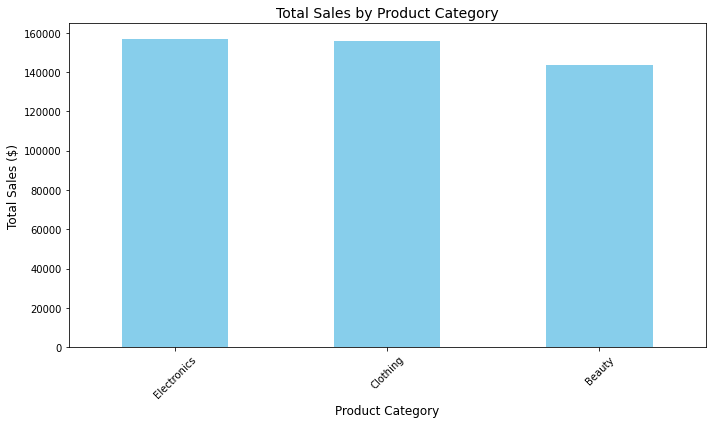

In [7]:
# Visualization: Bar Chart for Sales by Category
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_by_category.png')
plt.show()


<p>This line chart shows how sales change over each month, helping identify seasonal trends or growth patterns.</p>

In [8]:
# 2. Sales Trend Over Time
sales_by_month = df.groupby('Month-Year')['Total Amount'].sum()
print("\nSales by Month-Year:\n", sales_by_month)


Sales by Month-Year:
 Month-Year
2023-01    47190
2023-02    39430
2023-03    28750
2023-04    29715
2023-05    58590
2023-06    42205
2023-07    42505
2023-08    39155
2023-09    28605
2023-10    37130
2023-11    33070
2023-12    28205
2024-01     1530
Name: Total Amount, dtype: int64


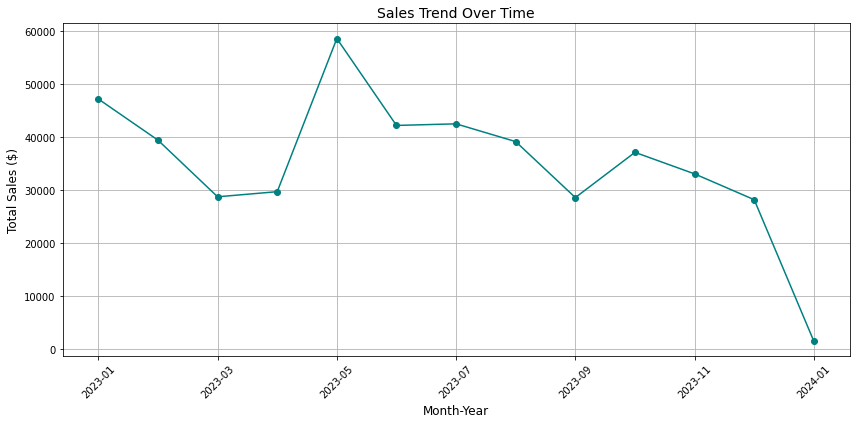

In [9]:
# Visualization: Line Chart for Sales Over Time
plt.figure(figsize=(12, 6))
sales_by_month.plot(kind='line', marker='o', color='teal')
plt.title('Sales Trend Over Time', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('sales_by_month.png')
plt.show()

<p>This visualization reveals purchasing patterns across male and female customers.</p>

In [10]:
# 3. Sales by Gender (Proxy for Region)
sales_by_gender = df.groupby('Gender')['Total Amount'].sum()
print("\nSales by Gender:\n", sales_by_gender)


Sales by Gender:
 Gender
Female    232840
Male      223240
Name: Total Amount, dtype: int64


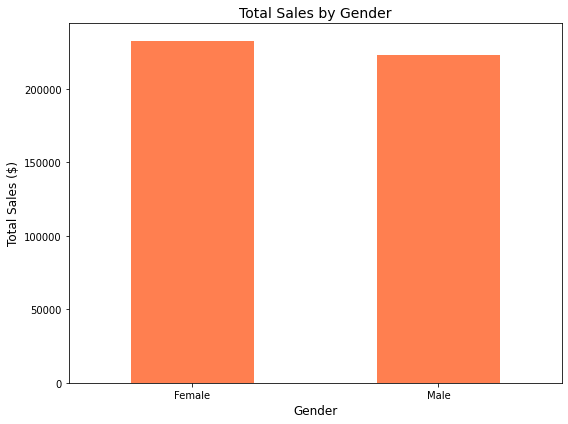

In [11]:
# Visualization: Bar Chart for Sales by Gender
plt.figure(figsize=(8, 6))
sales_by_gender.plot(kind='bar', color='coral')
plt.title('Total Sales by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('sales_by_gender.png')
plt.show()

<p>This histogram helps businesses understand the age demographics of their customer base.</p>

In [12]:
# 4. Age Group Analysis
# Create age bins
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

sales_by_age_group = df.groupby('Age Group')['Total Amount'].sum()
print("\nSales by Age Group:\n", sales_by_age_group)



Sales by Age Group:
 Age Group
18-25    74650
26-35    97140
36-45    96835
46-55    97265
56-65    90190
65+          0
Name: Total Amount, dtype: int64


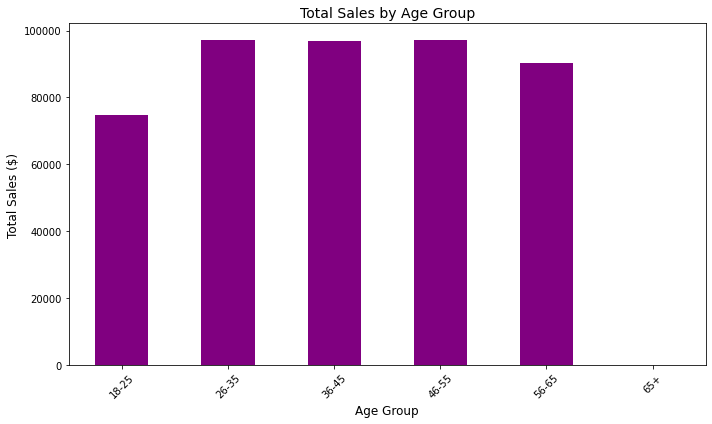

In [13]:
# Visualization: Bar Chart for Sales by Age Group
plt.figure(figsize=(10, 6))
sales_by_age_group.plot(kind='bar', color='purple')
plt.title('Total Sales by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_by_age_group.png')
plt.show()


In [14]:
# Business Insights
insights = """
Business Insights from Retail Sales Data:
1. **Top-Performing Category**: {} had the highest sales at ${:,.2f}, indicating strong demand in this category. Focus marketing efforts here.
2. **Seasonal Trends**: Sales peaked in {} with ${:,.2f}, suggesting a seasonal spike. Plan inventory and promotions accordingly.
3. **Gender-Based Performance**: {} customers contributed ${:,.2f}, higher than the other gender. Tailor campaigns to this demographic.
4. **Age Group Insight**: The {} age group drove ${:,.2f} in sales, the highest among all groups. Target this segment with relevant products.
""".format(
    sales_by_category.index[0], sales_by_category.iloc[0],
    sales_by_month.index[sales_by_month.argmax()], sales_by_month.max(),
    sales_by_gender.index[sales_by_gender.argmax()], sales_by_gender.max(),
    sales_by_age_group.index[sales_by_age_group.argmax()], sales_by_age_group.max()
)

# Save Insights to a Text File
with open('sales_insights.txt', 'w') as f:
    f.write(insights)

# Prepare Data for Power BI
# Aggregated data for dashboard
dashboard_data = df.groupby(['Month-Year', 'Product Category', 'Gender', 'Age Group'])['Total Amount'].sum().reset_index()
dashboard_data.to_csv('dashboard_data.csv', index=False)

print("\nEDA completed. Visualizations and insights saved.")


EDA completed. Visualizations and insights saved.


<ul>
  <li>💡 The most profitable categories can be focused on for promotions and stock optimization.</li>
  <li>📊 Gender and age group insights enable better targeting in marketing campaigns.</li>
  <li>📈 Monthly sales trends help in planning inventory and forecasting future demand.</li>
</ul>